In [11]:
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Open zip file
zf = zipfile.ZipFile('full_grouped.zip') 
# Open train_data.csv file on zip file
df = pd.read_csv(zf.open('full_grouped.csv'))
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


# 1. Informacoes dos dados

In [13]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [15]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [16]:
df.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

In [17]:
df.duplicated().sum()

0

## Renomeando colunas: Removendo '/' e espaços em branco

In [18]:
rename = [column.lower().replace(' ', '_').replace('/', '_') for column in df.columns]
df.columns = rename
df.head()

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


## Convertendo o tipo da coluna date para datetime

In [19]:
df.date = pd.to_datetime(df.date)
df.dtypes

date              datetime64[ns]
country_region            object
confirmed                  int64
deaths                     int64
recovered                  int64
active                     int64
new_cases                  int64
new_deaths                 int64
new_recovered              int64
who_region                object
dtype: object

In [20]:
display(df.head())
display(df.tail())

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


# 2. Analise e visualizacao dos dados

In [42]:
by_country = df.groupby(by=df.country_region).sum()
by_country.sort_values(by='deaths', ascending=False)

,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
country_region,,,,,,,
US,224345948,11011411,56353416,156981121,4290258,148011,1325804
United Kingdom,26748587,3997775,126217,22624595,301708,45844,1437
Brazil,89524967,3938034,54492873,31094060,2442375,87618,1846641
Italy,26745145,3707717,15673910,7363518,246434,35112,198593
France,21210926,3048524,7182115,10980287,226920,30212,81212
...,...,...,...,...,...,...,...
Bhutan,4971,0,2838,2133,99,0,86
Mongolia,16999,0,9902,7097,289,0,222
Timor-Leste,2487,0,0,2487,24,0,0


In [48]:
df_br = df[df.country_region == 'Brazil']
df_br

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region
23,2020-01-22,Brazil,0,0,0,0,0,0,0,Americas
210,2020-01-23,Brazil,0,0,0,0,0,0,0,Americas
397,2020-01-24,Brazil,0,0,0,0,0,0,0,Americas
584,2020-01-25,Brazil,0,0,0,0,0,0,0,Americas
771,2020-01-26,Brazil,0,0,0,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
34244,2020-07-23,Brazil,2287475,84082,1620313,583080,59961,1311,28338,Americas
34431,2020-07-24,Brazil,2343366,85238,1693214,564914,55891,1156,72901,Americas
34618,2020-07-25,Brazil,2394513,86449,1785359,522705,51147,1211,92145,Americas
34805,2020-07-26,Brazil,2419091,87004,1812913,519174,24578,555,27554,Americas


## Analisando casos confirmados e mortes

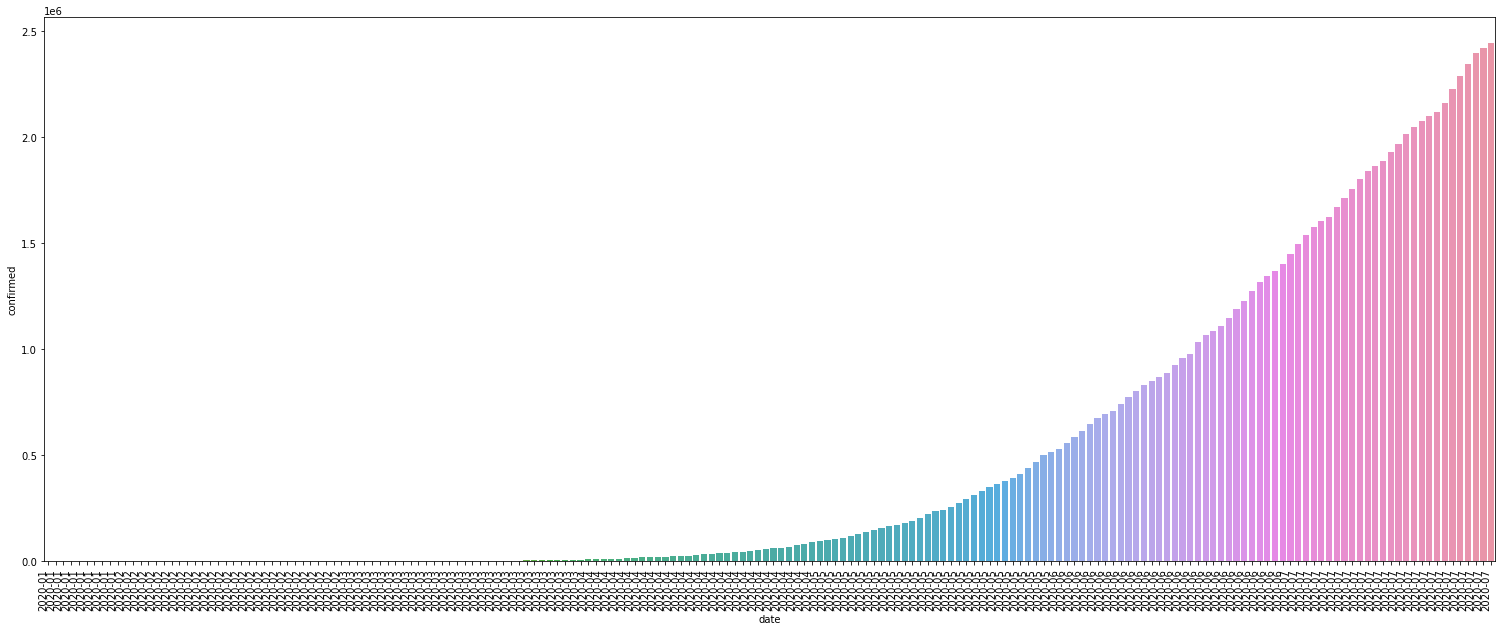

In [56]:
fig, ax = plt.subplots(figsize = (26,10))
ax = sns.barplot(x='date', y='confirmed', data=df_br, estimator = sum, ci = None, ax=ax)
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
ax = ax

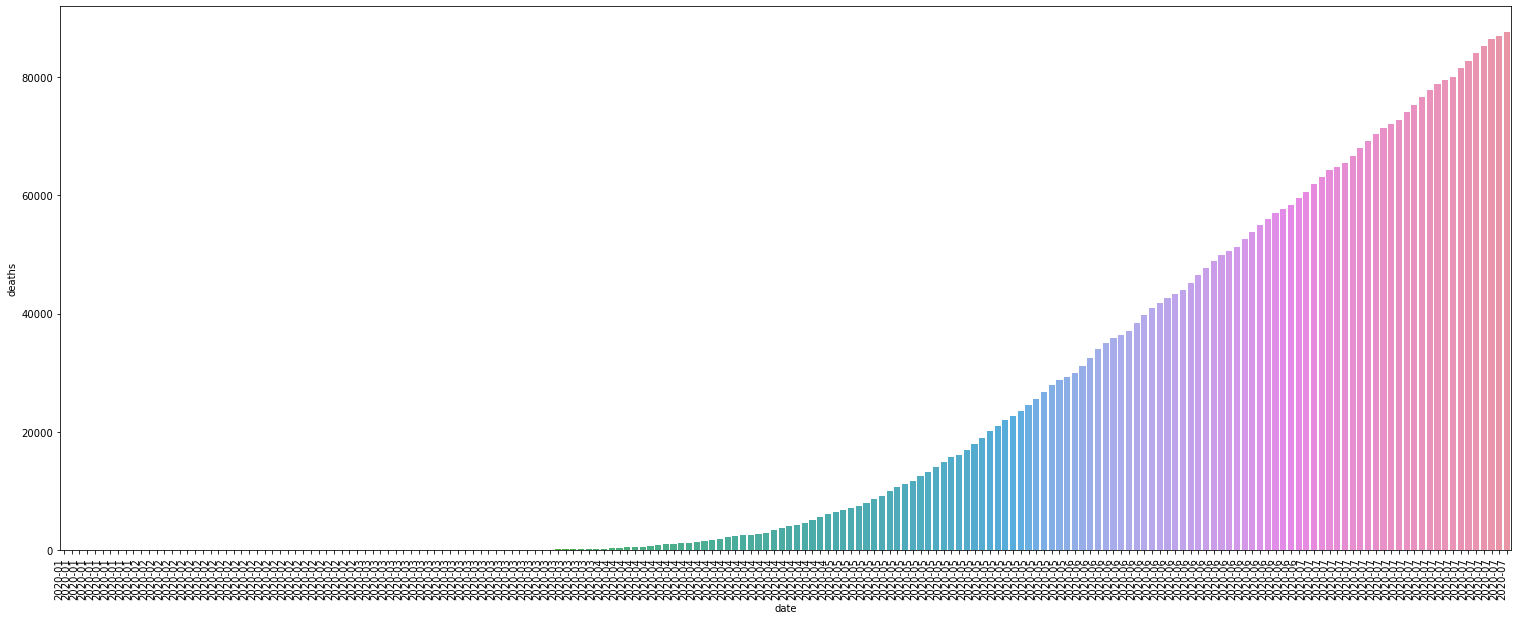

In [54]:
fig, ax = plt.subplots(figsize = (26,10))
ax = sns.barplot(x='date', y='deaths', data=df_br, estimator = sum, ci = None, ax=ax)
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
ax = ax

<AxesSubplot:xlabel='date', ylabel='confirmed'>

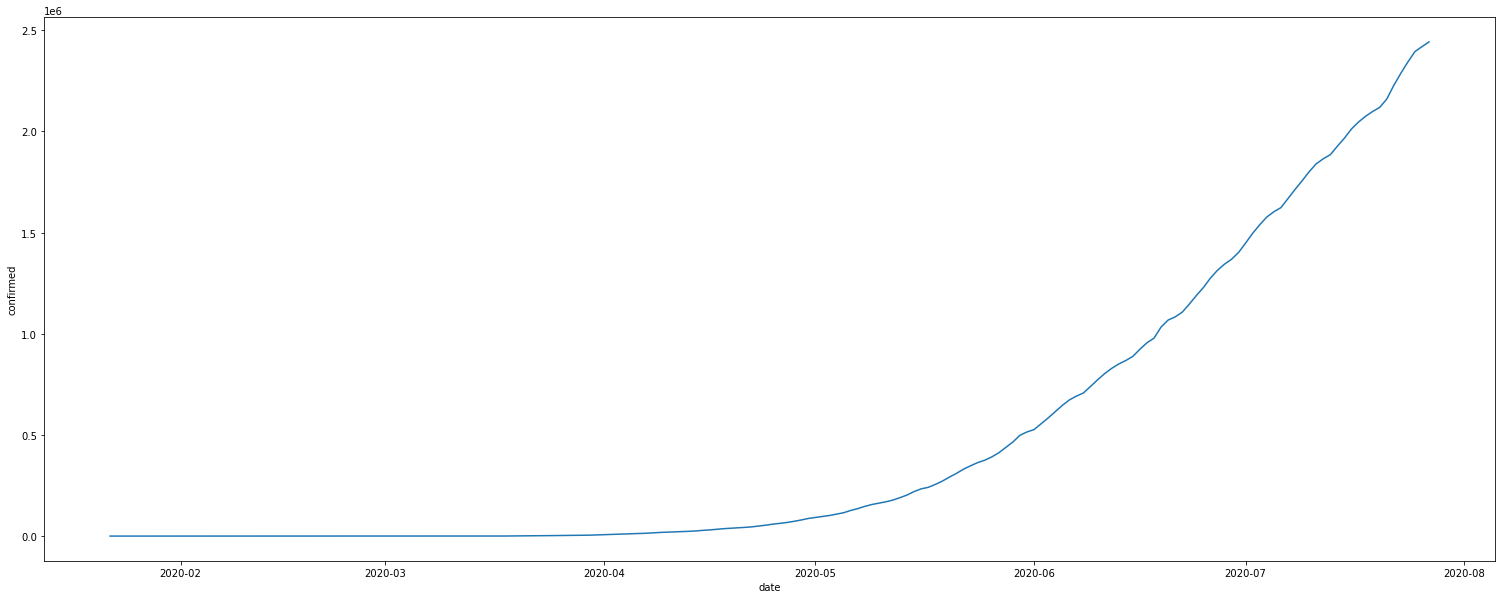

In [60]:
plt.figure(figsize=(26, 10))
sns.lineplot(x='date', y='confirmed', data=df_br)

<AxesSubplot:xlabel='date', ylabel='deaths'>

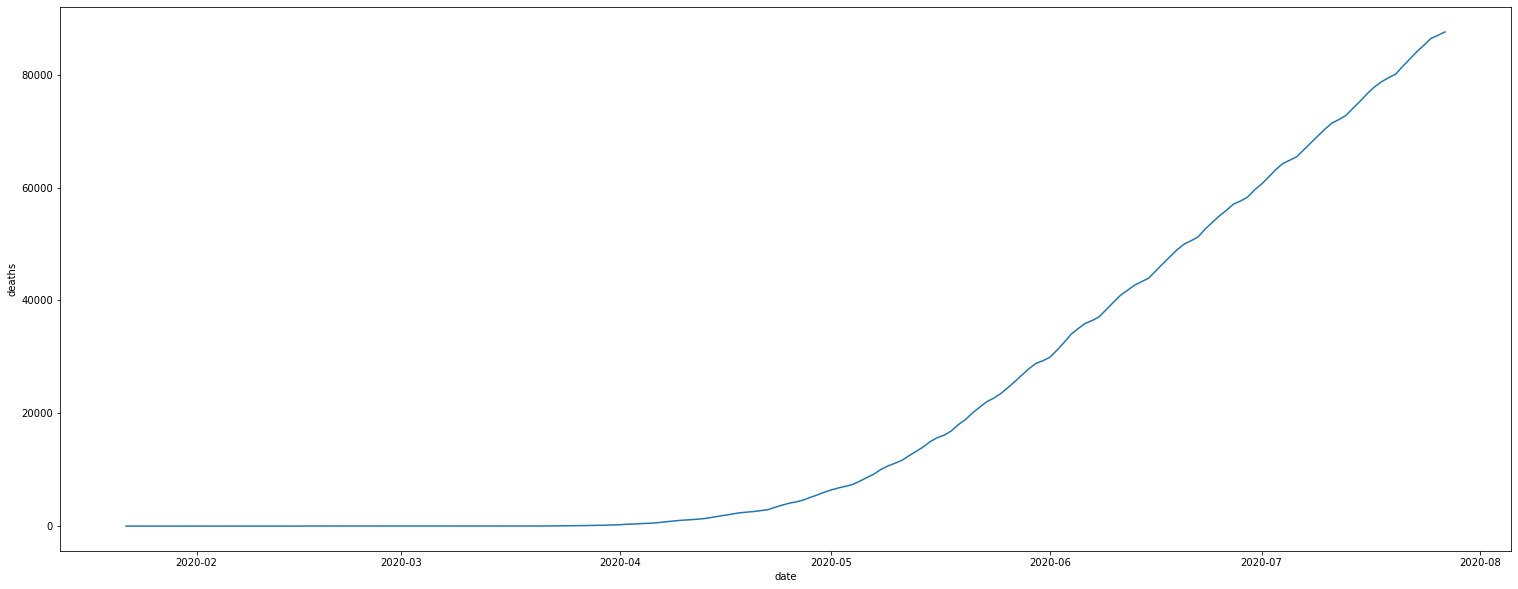

In [61]:
plt.figure(figsize=(26, 10))
sns.lineplot(x='date', y='deaths', data=df_br)